# **Segmenting and Clustering Neighborhoods in Toronto**

# Part 1. Postal codes

In [1]:
#!pip install lxml
#!pip install beautifulsoup4
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data = pd.read_html(url, attrs={"class": "wikitable"})[0] # 0 is for the 1st table in this particular page

In [2]:
## Visualize data
data

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


In [3]:
# Unique values of Borough
set(data['Borough'].tolist())

{'Central Toronto',
 'Downtown Toronto',
 'East Toronto',
 'East York',
 'Etobicoke',
 'Mississauga',
 'North York',
 'Not assigned',
 "Queen's Park",
 'Scarborough',
 'West Toronto',
 'York'}

In [4]:
# Remove rows with 'Not assigned' in Borough
df = data[data['Borough']!='Not assigned']
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


In [5]:
# Check for Neighbourhood equal to 'Not assigned'
df[df['Neighbourhood']=='Not assigned']

,Postcode,Borough,Neighbourhood
9,M9A,Queen's Park,Not assigned


In [6]:
# Modify just one row
df.at[9, 'Neighbourhood'] = df.loc[9, 'Borough']
df.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [7]:
# Group by Postcode and concatenate neighbourhoods
neighbourhood_df = df.groupby(['Postcode'])['Neighbourhood'].apply(', '.join).reset_index()
neighbourhood_df

,Postcode,Neighbourhood
0,M1B,"Rouge, Malvern"
1,M1C,"Highland Creek, Rouge Hill, Port Union"
2,M1E,"Guildwood, Morningside, West Hill"
3,M1G,Woburn
4,M1H,Cedarbrae
...,...,...
98,M9N,Weston
99,M9P,Westmount
100,M9R,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,"Albion Gardens, Beaumond Heights, Humbergate, ..."


In [8]:
# Form a dataframe with Postcode and Borough, and drop duplicates
borough_df = df[['Postcode', 'Borough']].drop_duplicates()
borough_df

,Postcode,Borough
2,M3A,North York
3,M4A,North York
4,M5A,Downtown Toronto
5,M6A,North York
7,M7A,Downtown Toronto
...,...,...
254,M8X,Etobicoke
261,M4Y,Downtown Toronto
264,M7Y,East Toronto
265,M8Y,Etobicoke


In [9]:
# Form the final Toronto dataframe
toronto_df = pd.merge(borough_df, neighbourhood_df, on='Postcode', how='inner').sort_values(by=['Postcode'])
toronto_df.columns = ['Postal Code', 'Borough', 'Neighborhood']
toronto_df

,Postal Code,Borough,Neighborhood
6,M1B,Scarborough,"Rouge, Malvern"
12,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae
...,...,...,...
64,M9N,York,Weston
70,M9P,Etobicoke,Westmount
77,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
89,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


In [10]:
# Print the dataframe shape
toronto_df.shape

(103, 3)

# Part 2. Postal Codes and Geodata

In [11]:
#!pip install geocoder
# Using the Geospatial_data csv file
geodata = pd.read_csv("http://cocl.us/Geospatial_data")
geodata

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [12]:
# Merge data as in 
toronto_df = pd.merge(toronto_df, geodata, on='Postal Code', how='inner')
toronto_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


In [13]:
# Print the dataframe shape
toronto_df.shape

(103, 5)

# Part 3. Toronto Clusters

In [14]:
print('There are {} boroughs and {} neighborhoods in Toronto.'.format(
        len(toronto_df['Borough'].unique()), toronto_df.shape[0]))

There are 11 boroughs and 103 neighborhoods in Toronto.


In [16]:
# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [17]:
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode('Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
print('Toronto coordinates are {}, {}.'.format(latitude, longitude))

Toronto coordinates are 43.653963, -79.387207.


In [18]:
# create map of Toronto
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)
toronto_map

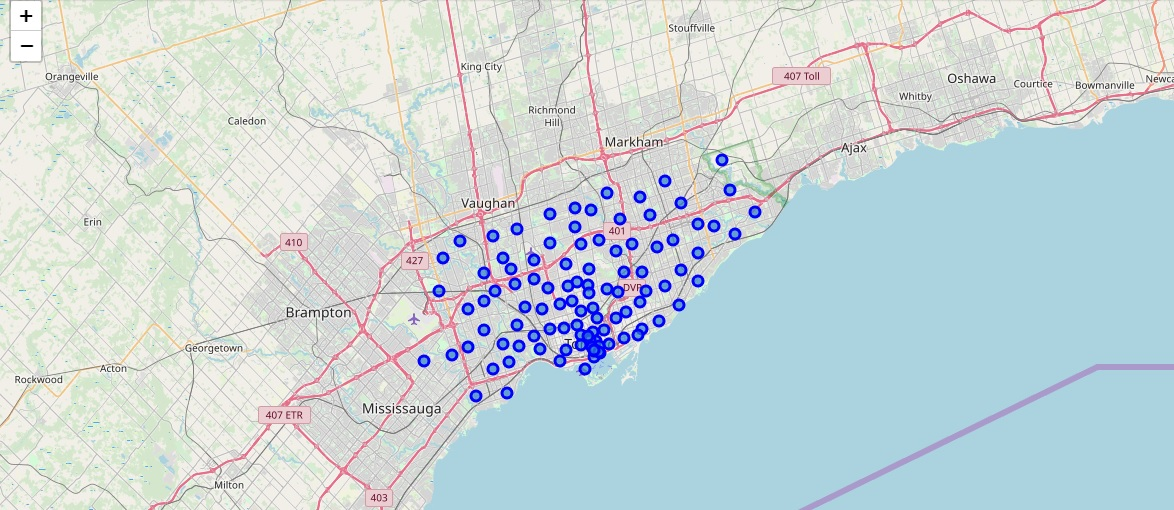

In [1]:
# in case the figure is not showed
from IPython.display import Image
Image("fig1.jpg")

In [19]:
# View number of neighborhoods
toronto_df['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Queen's Park         1
Name: Borough, dtype: int64

In [20]:
# We select the Downtown Toronto data, which has 19 neighborhoods
downtown = toronto_df[toronto_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [21]:
location = geolocator.geocode('Downtown Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
print('Downtown Toronto coordinates are {}, {}.'.format(latitude, longitude))

Downtown Toronto coordinates are 43.6563221, -79.3809161.


In [22]:
# Downtown Toronto map
downtown_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, label in zip(downtown['Latitude'], downtown['Longitude'], downtown['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(downtown_map)  
downtown_map

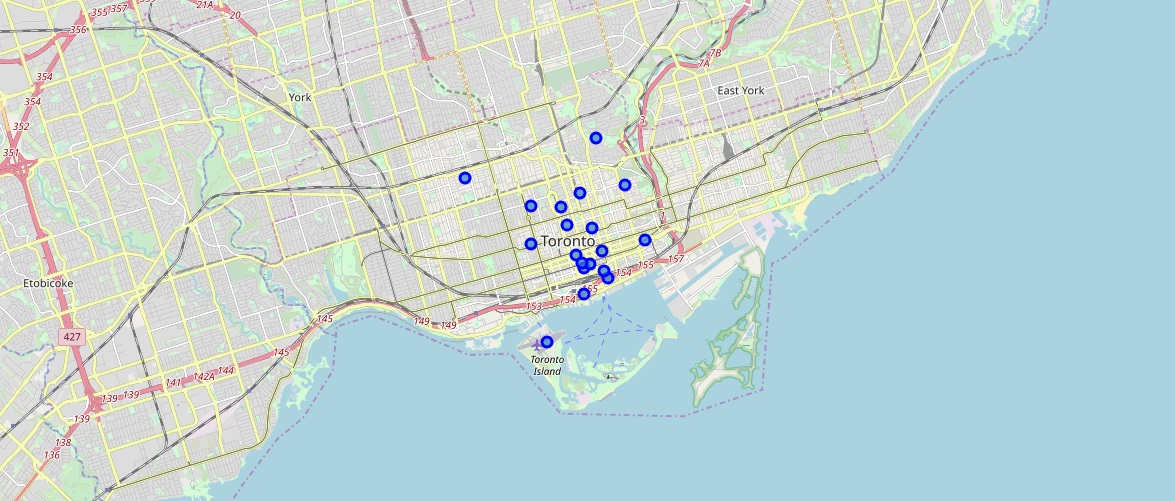

In [2]:
# in case the figure is not showed
Image("fig2.jpg")

In [24]:
# Data for getting venues with radius = 500
CLIENT_ID = 'S3SMSQKVF03VFKJ3ZAIORF2HKVNRGXG1WOTVMLFXICIZQ2XH' # your Foursquare ID
CLIENT_SECRET = '1NND1RJXS5YF3CWGELBEOAIYNM3N55JHGJZTE23FN2HWFS20' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

### The following codes are similar to the lab for Manhattan, New York

In [25]:
import requests
results = requests.get(url).json()

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
downtown_venues = getNearbyVenues(names=downtown['Neighborhood'],
                                   latitudes=downtown['Latitude'],
                                   longitudes=downtown['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Queen's Park


In [31]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",18,18,18,18,18,18
"Cabbagetown, St. James Town",44,44,44,44,44,44
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",85,85,85,85,85,85
Christie,18,18,18,18,18,18
Church and Wellesley,83,83,83,83,83,83
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [32]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 204 uniques categories.


In [33]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Bar,Thai Restaurant,Café,Sushi Restaurant,Restaurant,Bakery,Cosmetics Shop,Steakhouse,Burger Joint
1,Berczy Park,Coffee Shop,Cheese Shop,Steakhouse,Cocktail Bar,Café,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Greek Restaurant
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Rental Car Location,Plane,Boat or Ferry,Harbor / Marina,Coffee Shop,Airport Gate
3,"Cabbagetown, St. James Town",Coffee Shop,Bakery,Italian Restaurant,Pub,Market,Pizza Place,Restaurant,Café,Indian Restaurant,Sandwich Place
4,Central Bay Street,Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Japanese Restaurant,Burger Joint,Ice Cream Shop,Gym / Fitness Center,Department Store,Thai Restaurant


In [37]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 3, 0, 4, 0, 2, 0, 0, 0, 0, 0, 4, 4, 4, 1, 0, 0, 0],
      dtype=int32)

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Bakery,Italian Restaurant,Pub,Market,Pizza Place,Restaurant,Café,Indian Restaurant,Sandwich Place
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Hotel,Pub,Burger Joint,Men's Store,Mediterranean Restaurant
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,4,Coffee Shop,Pub,Park,Bakery,Mexican Restaurant,Breakfast Spot,Café,Theater,Gym / Fitness Center,Farmers Market
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Cosmetics Shop,Ramen Restaurant,Tea Room,Bakery,Middle Eastern Restaurant,Electronics Store


In [39]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

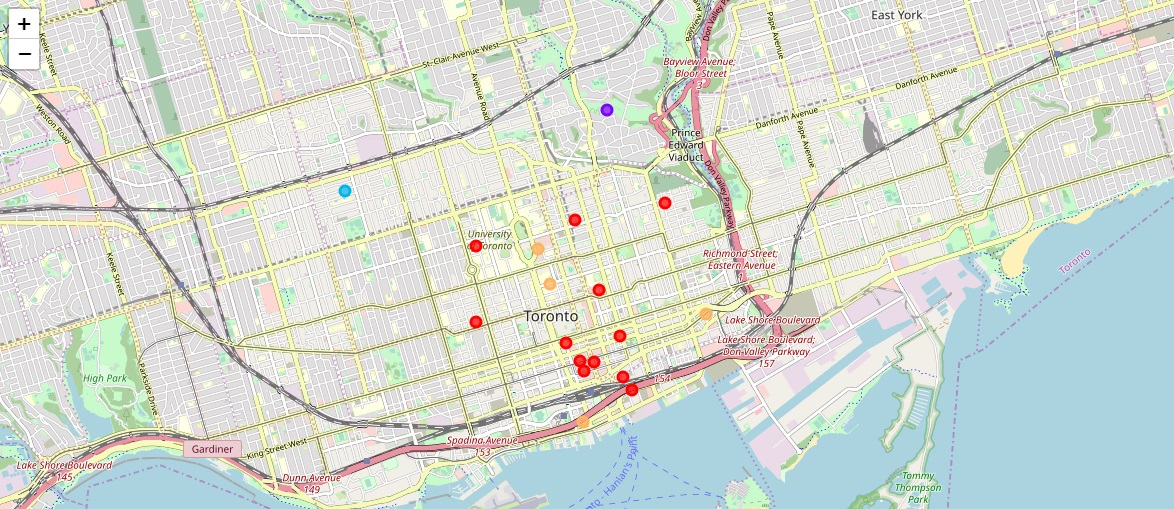

In [3]:
# in case the figure is not showed
Image("fig3.jpg")

In [40]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,0,Coffee Shop,Bakery,Italian Restaurant,Pub,Market,Pizza Place,Restaurant,Café,Indian Restaurant,Sandwich Place
2,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Hotel,Pub,Burger Joint,Men's Store,Mediterranean Restaurant
4,Downtown Toronto,0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Cosmetics Shop,Ramen Restaurant,Tea Room,Bakery,Middle Eastern Restaurant,Electronics Store
5,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Clothing Store,Diner,Breakfast Spot,Bakery,Cosmetics Shop,Beer Bar,Hotel
6,Downtown Toronto,0,Coffee Shop,Cheese Shop,Steakhouse,Cocktail Bar,Café,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Greek Restaurant
8,Downtown Toronto,0,Coffee Shop,Bar,Thai Restaurant,Café,Sushi Restaurant,Restaurant,Bakery,Cosmetics Shop,Steakhouse,Burger Joint
10,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Seafood Restaurant,Steakhouse,American Restaurant,Bar,Gastropub
11,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,Gym,Deli / Bodega,Steakhouse,Seafood Restaurant,Italian Restaurant,Bakery
12,Downtown Toronto,0,Café,Bar,Japanese Restaurant,Bookstore,Restaurant,Bakery,Coffee Shop,Beer Bar,Beer Store,Sandwich Place
13,Downtown Toronto,0,Bar,Vietnamese Restaurant,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Chinese Restaurant,Mexican Restaurant,Bakery,Dumpling Restaurant,Burger Joint


In [41]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Park,Playground,Trail,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner


In [42]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Downtown Toronto,2,Grocery Store,Café,Park,Athletics & Sports,Gas Station,Italian Restaurant,Diner,Nightclub,Candy Store,Restaurant


In [43]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,3,Airport Service,Airport Terminal,Airport Lounge,Boutique,Rental Car Location,Plane,Boat or Ferry,Harbor / Marina,Coffee Shop,Airport Gate


In [44]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Downtown Toronto,4,Coffee Shop,Pub,Park,Bakery,Mexican Restaurant,Breakfast Spot,Café,Theater,Gym / Fitness Center,Farmers Market
7,Downtown Toronto,4,Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Japanese Restaurant,Burger Joint,Ice Cream Shop,Gym / Fitness Center,Department Store,Thai Restaurant
9,Downtown Toronto,4,Coffee Shop,Aquarium,Hotel,Italian Restaurant,Café,Restaurant,Brewery,Scenic Lookout,Fried Chicken Joint,Baseball Stadium
18,Downtown Toronto,4,Coffee Shop,Park,Gym,Burger Joint,College Auditorium,Sandwich Place,Restaurant,Portuguese Restaurant,Burrito Place,Café


### We note that three neighborhoods are isolated forming single-member clusters, one of them being where the airport is located. The two clusters with more members are geographically located in the center of the district. 
* Label 0: Downtown (Meals, Hotels)
* Label 1: Parks
* Label 2: More Services
* Label 3: Airport
* Label 4: Downtown (Entertainment)